# Fuel Price In India

- The data is daily diesel price across the various city in India. 
- The charge varies state to state has Indian state government levy extra tax on the fuel. 
- The government changed over time. The new fuel charge update rule came into effect.
- The data consist of the date, fuel price and city name. 
- There are a total of seven cities, such as Bengaluru, Chennai, Mumbai, Hyderabad, Delhi, Kolkata and Coimbatore. 
- The fuel price is Indian rupees.
- How to handle missing data in time-series data?
- What is the price change with respect to a global price change?

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

## Reading and viewing data

In [2]:
d=pd.read_csv("diesel.csv")
d

,city,date,rate,state
0,Agartala,2012-10-27,46.93,Tripura
1,Agartala,2013-01-18,47.45,Tripura
2,Agartala,2013-02-16,47.96,Tripura
3,Agartala,2013-03-23,47.46,Tripura
4,Agartala,2013-04-01,48.47,Tripura
...,...,...,...,...
17230,Varanasi,2020-12-27,74.84,Uttar Pradesh
17231,Varanasi,2020-12-28,74.84,Uttar Pradesh
17232,Varanasi,2020-12-29,74.84,Uttar Pradesh
17233,Varanasi,2020-12-30,74.84,Uttar Pradesh


## Print top 5 rows

In [3]:
d.head()

,city,date,rate,state
0,Agartala,2012-10-27,46.93,Tripura
1,Agartala,2013-01-18,47.45,Tripura
2,Agartala,2013-02-16,47.96,Tripura
3,Agartala,2013-03-23,47.46,Tripura
4,Agartala,2013-04-01,48.47,Tripura


## Bottom 5 rows

In [4]:
d.tail()

,city,date,rate,state
17230,Varanasi,2020-12-27,74.84,Uttar Pradesh
17231,Varanasi,2020-12-28,74.84,Uttar Pradesh
17232,Varanasi,2020-12-29,74.84,Uttar Pradesh
17233,Varanasi,2020-12-30,74.84,Uttar Pradesh
17234,Varanasi,2020-12-31,74.84,Uttar Pradesh


## Checking data types

In [5]:
d.dtypes

city      object
date      object
rate     float64
state     object
dtype: object

## Changing the date format

In [6]:
d['date']=pd.to_datetime(d['date'],format='%Y-%m-%d')

In [7]:
d['date']

0       2012-10-27
1       2013-01-18
2       2013-02-16
3       2013-03-23
4       2013-04-01
           ...    
17230   2020-12-27
17231   2020-12-28
17232   2020-12-29
17233   2020-12-30
17234   2020-12-31
Name: date, Length: 17235, dtype: datetime64[ns]

## Shape of the dataset

In [8]:
d.shape

(17235, 4)

## Number of dimensions

In [9]:
d.ndim

2

## Print index

In [10]:
d.index

RangeIndex(start=0, stop=17235, step=1)

## Column names

In [11]:
d.columns

Index(['city', 'date', 'rate', 'state'], dtype='object')

## Information of the dataset

In [12]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17235 entries, 0 to 17234
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   city    17235 non-null  object        
 1   date    17235 non-null  datetime64[ns]
 2   rate    17235 non-null  float64       
 3   state   17235 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 538.7+ KB


## Sum of missing values

In [13]:
d.isna().sum()

city     0
date     0
rate     0
state    0
dtype: int64

## Number of unique values

In [14]:
d.nunique()

city       19
date     1197
rate     3159
state      14
dtype: int64

## Print unique cities in city column

In [15]:
d.city.unique()

array(['Agartala', 'Aizwal', 'Allahabad', 'Bengaluru', 'Chennai',
       'Coimbatore', 'Delhi', 'Dimapur', 'Haridwar', 'Hyderabad',
       'Karaikal', 'Kolkata', 'Madurai', 'Meerut', 'Mumbai', 'Nizamabad',
       'Pondicherry', 'Shillong', 'Varanasi'], dtype=object)

## Print states in the data set

In [16]:
d.state.unique()

array(['Tripura', 'Mizoram', 'Uttar Pradesh', 'Karnataka', 'Tamil Nadu',
       'Delhi', 'Nagaland', 'Uttarakhand', 'Telangana', 'Puducherry',
       'West Bengal', 'Maharashtra', 'Pondicherry', 'Meghalaya'],
      dtype=object)

## Print statistical informations

In [17]:
d.describe()

,rate
count,17235.000000
mean,67.010356
std,8.460510
min,18.050000
25%,63.170000
50%,67.980000
75%,72.270000
max,83.360000


## All statistical information including null values

In [18]:
d.describe(include="all")

,city,date,rate,state
count,17235,17235,17235.000000,17235
unique,19,1197,NaN,14
top,Chennai,2019-06-07 00:00:00,NaN,Tamil Nadu
freq,1189,31,NaN,2974
first,NaN,2002-06-16 00:00:00,NaN,NaN
last,NaN,2020-12-31 00:00:00,NaN,NaN
mean,NaN,NaN,67.010356,NaN
std,NaN,NaN,8.460510,NaN
min,NaN,NaN,18.050000,NaN
25%,NaN,NaN,63.170000,NaN


## Check for duplicated values

In [19]:
d.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
17230    False
17231    False
17232    False
17233    False
17234    False
Length: 17235, dtype: bool

## Sum of duplicated values

In [20]:
d.duplicated().sum()

300

## Dropping duplicated values

In [21]:
d.drop_duplicates(subset=None, inplace=True)

In [22]:
d.duplicated().sum()

0

## Extracting year from date and creating a column for the same

In [23]:
d["year"]=pd.DatetimeIndex(d["date"]).year
d

,city,date,rate,state,year
0,Agartala,2012-10-27,46.93,Tripura,2012
1,Agartala,2013-01-18,47.45,Tripura,2013
2,Agartala,2013-02-16,47.96,Tripura,2013
3,Agartala,2013-03-23,47.46,Tripura,2013
4,Agartala,2013-04-01,48.47,Tripura,2013
...,...,...,...,...,...
17230,Varanasi,2020-12-27,74.84,Uttar Pradesh,2020
17231,Varanasi,2020-12-28,74.84,Uttar Pradesh,2020
17232,Varanasi,2020-12-29,74.84,Uttar Pradesh,2020
17233,Varanasi,2020-12-30,74.84,Uttar Pradesh,2020


## Number of times each states are appearing in the dataset

In [24]:
d.state.value_counts()

Tamil Nadu       2928
Uttar Pradesh    2378
Telangana        1849
Maharashtra      1171
Delhi            1170
West Bengal      1158
Karnataka        1111
Pondicherry       938
Meghalaya         936
Mizoram           932
Tripura           815
Nagaland          793
Uttarakhand       378
Puducherry        378
Name: state, dtype: int64

## In this dataset,Tamilnadu is comming more frequently,and then Uttar Pradesh.

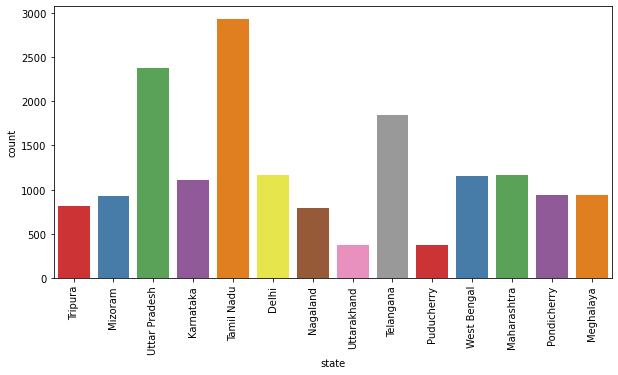

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(d["state"],palette='Set1')
plt.xticks(rotation=90)
plt.show()

## Number of times each cities appear in the dataset

In [26]:
d.city.value_counts()

Chennai        1171
Mumbai         1171
Delhi          1170
Kolkata        1158
Hyderabad      1115
Bengaluru      1111
Coimbatore      963
Pondicherry     938
Shillong        936
Aizwal          932
Agartala        815
Madurai         794
Meerut          794
Varanasi        794
Dimapur         793
Allahabad       790
Nizamabad       734
Karaikal        378
Haridwar        378
Name: city, dtype: int64

## Count plot for the number of times each cities appear in the data

- On the basis of city,Chennai and Mumbai are comming more frequntly,then Delhi is in the next position.

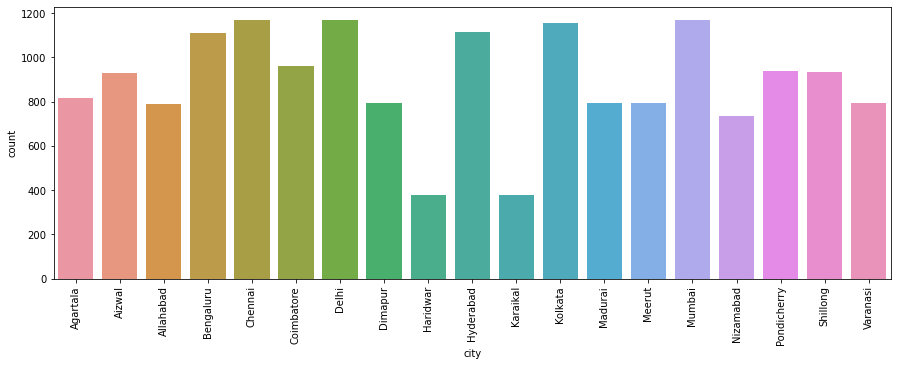

In [27]:
plt.figure(figsize=(15,5))
sns.countplot(d["city"])
plt.xticks(rotation=90)
plt.show()

## Peak diesel price per day

In [28]:
day_rateP=d.sort_values('rate',ascending=False)
day_rateP.head()

,city,date,rate,state,year
13949,Nizamabad,2018-10-16,83.36,Telangana,2018
13950,Nizamabad,2018-10-18,83.24,Telangana,2018
13951,Nizamabad,2018-10-19,83.13,Telangana,2018
13948,Nizamabad,2018-10-15,83.11,Telangana,2018
13937,Nizamabad,2018-10-04,83.10,Telangana,2018


## Bar plot for peak diesel price

- Telangana(Nizamabad) has the highest diesel rate.

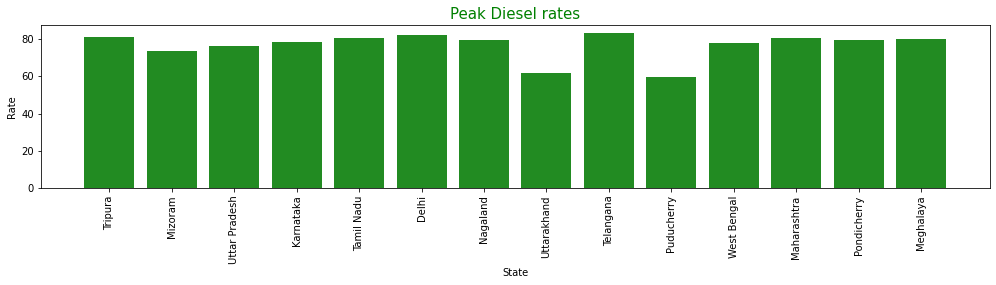

In [29]:
plt.figure(figsize=(17,3))
plt.bar(d['state'],d['rate'],color='forestgreen')
plt.title('Peak Diesel rates',fontsize=15,color='green')
plt.xlabel("State",fontsize=10,color='black')
plt.xticks(rotation=90)
plt.ylabel("Rate",fontsize=10,color='black')
plt.show()

## Lowest diesel price per day

In [30]:
lowest_rate=d.groupby(['state']).agg({"rate":"min"})                                                                                   
lowest_rate

,rate
state,
Delhi,18.05
Karnataka,44.98
Maharashtra,22.95
Meghalaya,43.74
Mizoram,42.02
Nagaland,46.02
Pondicherry,44.66
Puducherry,47.91
Tamil Nadu,19.83


## Bar plot for lowest diesel rates

- Delhi has the lowest diesel rate.

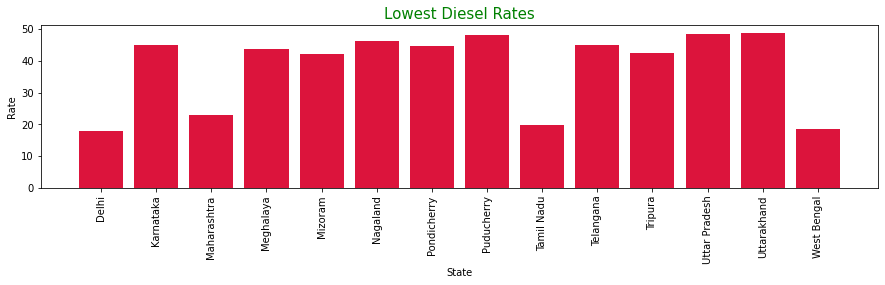

In [31]:
plt.figure(figsize=(15,3))
plt.bar(lowest_rate.index,lowest_rate['rate'],color='crimson')
plt.title('Lowest Diesel Rates',fontsize=15,color='green')
plt.xlabel("State",fontsize=10,color='black')
plt.xticks(rotation=90)
plt.ylabel("Rate",fontsize=10,color='black')
plt.show()

## Groupby state and city and maximum of rate

In [32]:
state_city=d.groupby(['state','city']).max()
state_city

,,date,rate,year
state,city,,,
Delhi,Delhi,2020-12-31,82.00,2020
Karnataka,Bengaluru,2020-12-31,78.27,2020
Maharashtra,Mumbai,2020-12-31,80.47,2020
Meghalaya,Shillong,2020-12-31,79.97,2020
Mizoram,Aizwal,2020-12-31,73.29,2020
Nagaland,Dimapur,2020-12-31,79.47,2020
Pondicherry,Pondicherry,2020-12-31,79.28,2020
Puducherry,Karaikal,2020-12-31,59.75,2020
Tamil Nadu,Chennai,2020-12-31,80.10,2020


## Sorting state_city by rate

In [33]:
state_city.sort_values("rate")

date   rate  year
state         city                               
Puducherry    Karaikal    2020-12-31  59.75  2020
Uttarakhand   Haridwar    2020-12-31  61.59  2020
Mizoram       Aizwal      2020-12-31  73.29  2020
Uttar Pradesh Meerut      2020-12-31  75.40  2020
              Allahabad   2020-12-31  75.67  2020
              Varanasi    2020-12-31  76.19  2020
West Bengal   Kolkata     2020-12-31  77.59  2020
Karnataka     Bengaluru   2020-12-31  78.27  2020
Pondicherry   Pondicherry 2020-12-31  79.28  2020
Nagaland      Dimapur     2020-12-31  79.47  2020
Meghalaya     Shillong    2020-12-31  79.97  2020
Tamil Nadu    Chennai     2020-12-31  80.10  2020
              Coimbatore  2020-12-31  80.45  2020
Maharashtra   Mumbai      2020-12-31  80.47  2020
Tamil Nadu    Madurai     2020-12-31  80.71  2020
Tripura       Agartala    2020-12-31  81.00  2020
Delhi         Delhi       2020-12-31  82.00  2020
Telangana     Hyderabad   2020-12-31  82.38  2020
              Nizamabad   2020-12-31  83.36  2020

## Boxplot for distirbution of rate in state_city

- Maharashtra has the highest total diesel rate,Telengana is in the next position.
- Puducherry has the lowest total diesel rate,Uttarakhand is in the second position in lowest total diesel rate.

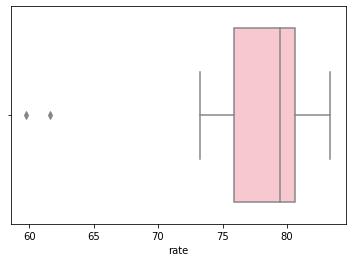

In [34]:
sns.boxplot(state_city["rate"],color='pink')
plt.show()

## KDE Plot to show the distibution of diesel rate

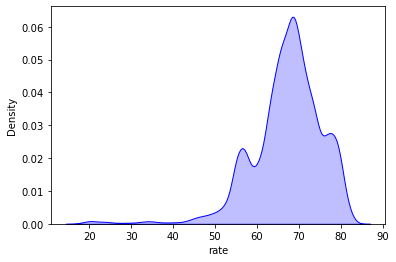

In [35]:
sns.kdeplot(d['rate'],color='blue',shade=True)
plt.show()

## KDE Plot to show the distribution of diesel rate against date

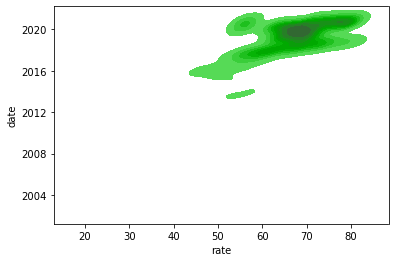

In [36]:
sns.kdeplot(d['rate'],d['date'],color='green',shade=True)
plt.show()

## Swarmplot for diesel rate and year

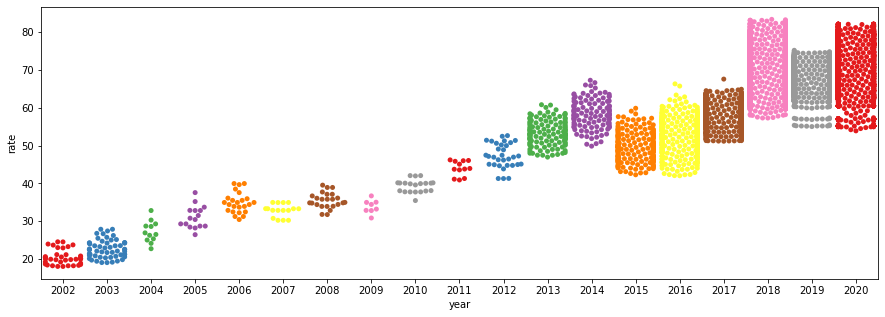

In [37]:
plt.figure(figsize=(15,5))
sns.swarmplot(x='year',y='rate',data=d,palette='Set1')
plt.show()

## Pairplot showing relationship between diesel rate, year and state

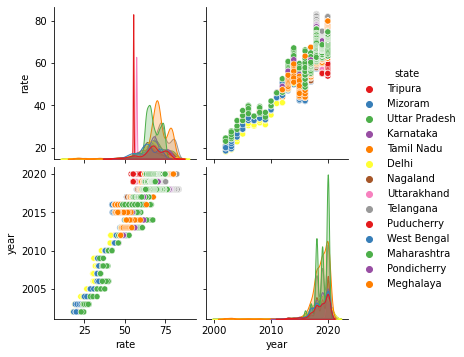

In [38]:
sns.pairplot(d,hue='state',palette='Set1')
plt.show()

## Distplot showing the distribution of diesel rate

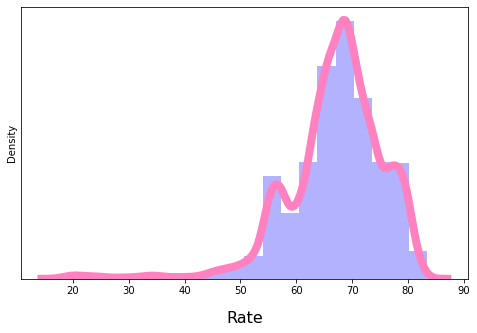

In [39]:
plt.figure(figsize=(8,5))
sns.distplot(d.rate,bins=20,kde_kws={"lw":8,'color':'xkcd:pink'},hist_kws={'alpha':.3,'color':'blue'})
plt.xlabel('Rate',fontsize=16,labelpad=15)
plt.yticks([])
plt.show()

## Extracting the state Telangana

In [40]:
Telengana=d[d["state"]=="Telangana"]
Telengana

,city,date,rate,state,year
8238,Hyderabad,2011-07-01,45.08,Telangana,2011
8239,Hyderabad,2012-07-25,44.94,Telangana,2012
8240,Hyderabad,2012-08-01,45.06,Telangana,2012
8241,Hyderabad,2012-09-14,51.17,Telangana,2012
8242,Hyderabad,2012-10-27,51.35,Telangana,2012
...,...,...,...,...,...
14532,Nizamabad,2020-12-27,82.06,Telangana,2020
14533,Nizamabad,2020-12-28,82.06,Telangana,2020
14534,Nizamabad,2020-12-29,82.06,Telangana,2020
14535,Nizamabad,2020-12-30,82.06,Telangana,2020


## Unique cities in Telengana state

In [41]:
Telengana.city.unique()

array(['Hyderabad', 'Nizamabad'], dtype=object)

## Datewise maximum of diesel rates in Telengana

In [42]:
telng_date_max=Telengana.groupby(['date'])['rate'].max()
telng_date_max

date
2011-07-01    45.08
2012-07-25    44.94
2012-08-01    45.06
2012-09-14    51.17
2012-10-27    51.35
              ...  
2020-12-27    82.06
2020-12-28    82.06
2020-12-29    82.06
2020-12-30    82.06
2020-12-31    82.06
Name: rate, Length: 1128, dtype: float64

## Creating dataframe for above

In [43]:
telengDF=pd.DataFrame(telng_date_max)
telengDF

,rate
date,
2011-07-01,45.08
2012-07-25,44.94
2012-08-01,45.06
2012-09-14,51.17
2012-10-27,51.35
...,...
2020-12-27,82.06
2020-12-28,82.06
2020-12-29,82.06


## Sorting the details of Telengana by rate

- In Telangana,highest diesel rate is 83.36 on 16-10-2018.
- The lowest diesel rate is 44.94 on 25-07-2012.

In [44]:
tDF=telengDF.sort_values('rate',ascending=False)
tDF

,rate
date,
2018-10-16,83.36
2018-10-18,83.24
2018-10-19,83.13
2018-10-15,83.11
2018-10-04,83.10
...,...
2016-01-15,48.18
2016-02-01,48.14
2011-07-01,45.08


## Extracting the details for Nizamabad in Telengana

In [45]:
Nizamabad=d[d['city']=='Nizamabad']
Nizamabad

,city,date,rate,state,year
13733,Nizamabad,2018-01-05,66.07,Telangana,2018
13749,Nizamabad,2018-01-08,66.66,Telangana,2018
13765,Nizamabad,2018-01-09,66.79,Telangana,2018
13781,Nizamabad,2018-01-10,66.93,Telangana,2018
13797,Nizamabad,2018-01-11,67.13,Telangana,2018
...,...,...,...,...,...
14532,Nizamabad,2020-12-27,82.06,Telangana,2020
14533,Nizamabad,2020-12-28,82.06,Telangana,2020
14534,Nizamabad,2020-12-29,82.06,Telangana,2020
14535,Nizamabad,2020-12-30,82.06,Telangana,2020


## Barplot showing details of Nizamabad

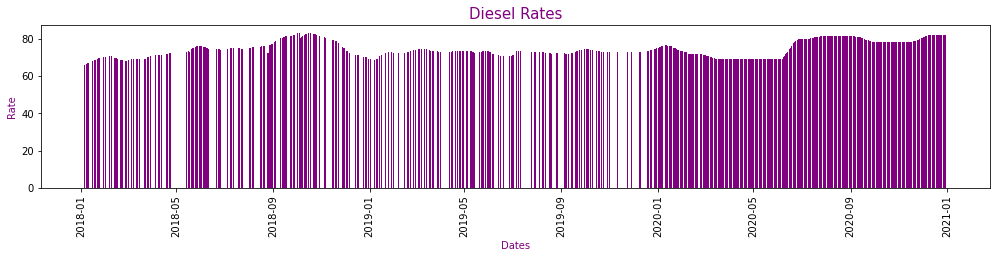

In [46]:
plt.figure(figsize=(17,3))
plt.bar(Nizamabad['date'],Nizamabad['rate'],color='purple')
plt.title('Diesel Rates',fontsize=15,color='purple')
plt.xlabel("Dates",fontsize=10,color='purple')
plt.xticks(rotation=90)
plt.ylabel("Rate",fontsize=10,color='purple')
plt.show()

In [47]:
Nizamabad.rate.value_counts()

69.06    82
78.26    49
82.06    25
81.43    21
81.61    18
         ..
83.36     1
83.11     1
83.02     1
82.82     1
72.42     1
Name: rate, Length: 396, dtype: int64

## Sorting details of Nizamabad by rate

In [48]:
Nizamabad.sort_values(by="rate",ascending=False)

,city,date,rate,state,year
13949,Nizamabad,2018-10-16,83.36,Telangana,2018
13950,Nizamabad,2018-10-18,83.24,Telangana,2018
13951,Nizamabad,2018-10-19,83.13,Telangana,2018
13948,Nizamabad,2018-10-15,83.11,Telangana,2018
13937,Nizamabad,2018-10-04,83.10,Telangana,2018
...,...,...,...,...,...
13797,Nizamabad,2018-01-11,67.13,Telangana,2018
13781,Nizamabad,2018-01-10,66.93,Telangana,2018
13765,Nizamabad,2018-01-09,66.79,Telangana,2018
13749,Nizamabad,2018-01-08,66.66,Telangana,2018


## Checking the missing values

In [49]:
Nizamabad.isnull().sum()

city     0
date     0
rate     0
state    0
year     0
dtype: int64

## Statistical details for Nizamabad

- The highest diesel rate in Nizamabad is 83.36 and lowest rate is 66.07

In [50]:
Nizamabad.describe()

,rate,year
count,734.000000,734.000000
mean,74.894019,2019.216621
std,4.464085,0.842718
min,66.070000,2018.000000
25%,71.390000,2018.000000
50%,73.845000,2019.000000
75%,78.777500,2020.000000
max,83.360000,2020.000000


# Monthly prediction

## Month wise maximum values of Nizamabad

In [51]:
mnz=Nizamabad.copy()
nz_month=mnz
nz_month.set_index('date',inplace=True)
nz_month.index = pd.to_datetime(nz_month.index,format='%Y-%m-%d')
nz_month=nz_month.resample('M').max()
print(nz_month)

                 city   rate      state  year
date                                         
2018-01-31  Nizamabad  70.38  Telangana  2018
2018-02-28  Nizamabad  70.62  Telangana  2018
2018-03-31  Nizamabad  70.61  Telangana  2018
2018-04-30  Nizamabad  72.54  Telangana  2018
2018-05-31  Nizamabad  76.30  Telangana  2018
2018-06-30  Nizamabad  76.18  Telangana  2018
2018-07-31  Nizamabad  75.39  Telangana  2018
2018-08-31  Nizamabad  77.40  Telangana  2018
2018-09-30  Nizamabad  82.42  Telangana  2018
2018-10-31  Nizamabad  83.36  Telangana  2018
2018-11-30  Nizamabad  81.26  Telangana  2018
2018-12-31  Nizamabad  74.32  Telangana  2018
2019-01-31  Nizamabad  72.86  Telangana  2019
2019-02-28  Nizamabad  73.92  Telangana  2019
2019-03-31  Nizamabad  74.65  Telangana  2019
2019-04-30  Nizamabad  73.66  Telangana  2019
2019-05-31  Nizamabad  73.57  Telangana  2019
2019-06-30  Nizamabad  73.36  Telangana  2019
2019-07-31  Nizamabad  73.73  Telangana  2019
2019-08-31  Nizamabad  73.00  Tela

## Shape of the data

In [52]:
nz_month.shape

(36, 4)

## To check is there any missing values in Nizamabad monthly data

In [53]:
nz_month.isnull().sum()

city     0
rate     0
state    0
year     0
dtype: int64

## Creating a list of numbers from 1 to 36

In [54]:
x_list=[]
for i in range(1,37):
    x_list.append(i)
x_nz=np.array(x_list)

## Printing values

In [55]:
print(x_nz)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36]


## Creating the rate array

In [56]:
y_list=nz_month['rate']
y_nz=np.array(y_list)

## Printing the rate array

In [57]:
print(y_nz)

[70.38 70.62 70.61 72.54 76.3  76.18 75.39 77.4  82.42 83.36 81.26 74.32
 72.86 73.92 74.65 73.66 73.57 73.36 73.73 73.   74.49 74.69 72.91 75.18
 76.51 73.25 71.25 69.06 69.06 79.92 81.43 81.61 81.61 78.35 80.49 82.06]


## Creating data frame for month and rate

In [58]:
datad={'months':x_nz,'rate':y_nz}
diesel=pd.DataFrame(datad)
diesel

,months,rate
0,1,70.38
1,2,70.62
2,3,70.61
3,4,72.54
4,5,76.30
5,6,76.18
6,7,75.39
7,8,77.40
8,9,82.42
9,10,83.36


## Assigning required columns into x and y

In [59]:
x1=diesel.iloc[:,:-1].values
y1=diesel.iloc[:,1].values

## Display elements and shape of data

In [60]:
x1

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36]])

In [61]:
x1.shape # 2 dimensional array

(36, 1)

In [62]:
y1 

array([70.38, 70.62, 70.61, 72.54, 76.3 , 76.18, 75.39, 77.4 , 82.42,
       83.36, 81.26, 74.32, 72.86, 73.92, 74.65, 73.66, 73.57, 73.36,
       73.73, 73.  , 74.49, 74.69, 72.91, 75.18, 76.51, 73.25, 71.25,
       69.06, 69.06, 79.92, 81.43, 81.61, 81.61, 78.35, 80.49, 82.06])

In [63]:
y1.shape # Single dimension

(36,)

## Perform the split into training/ testing set

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.4,random_state=1)

In [65]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(21, 1)
(15, 1)
(21,)
(15,)


## Print the mean values

In [66]:
print(np.mean(x_train.shape))
print(np.mean(x_test.shape))
print(np.mean(y_train.shape))
print(np.mean(y_test.shape))

11.0
8.0
21.0
15.0


## Create linear regression object

In [67]:
l=LinearRegression()
l.fit(x_train,y_train) # Train the model using training sets
print("Train test complete")

Train test complete


## Make predictions using the training set

In [68]:
ym_pred=l.predict(x_test)

## Dataframe for actual and predicted

In [69]:
d1=pd.DataFrame({'Actual':y_test,'Predicted':ym_pred})
d1

,Actual,Predicted
0,81.43,79.350917
1,80.49,80.159771
2,69.06,78.946490
3,72.54,73.891151
4,73.00,77.126568
5,73.36,76.722140
6,74.69,77.530995
7,75.18,77.935422
8,79.92,79.148703
9,71.25,78.542062


## Mean absolute error

In [70]:
print('mean absolute error',mean_absolute_error(y_test,ym_pred))

mean absolute error 3.6674259887005625


## Regression plot

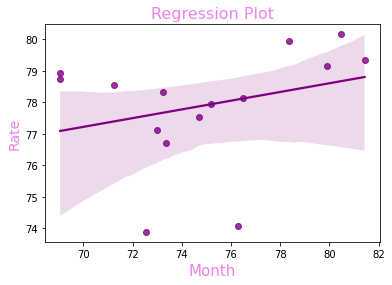

In [71]:
sns.regplot(x=y_test,y=ym_pred,color='purple')
plt.title('Regression Plot',size=16,color='violet')
plt.ylabel('Rate',size=14,color='violet')
plt.xlabel('Month',size=15,color='violet')
plt.show()

## Prediction of diesel price in the months of 2021 according to past data

In [72]:
pred_rate=[]
for i in range(37,49):
    h=[i]
    r=l.predict([h])
    pred_rate.append(float(r))

## Creating dataframe for diesel price predicted for months in 2021

In [73]:
mnths=pd.date_range('2021-01-01',periods=12,freq='M')
diesel_predict=pd.DataFrame({'Months':mnths,'Predicted rate':pred_rate})
diesel_predict

,Months,Predicted rate
0,2021-01-31,80.564198
1,2021-02-28,80.766412
2,2021-03-31,80.968625
3,2021-04-30,81.170839
4,2021-05-31,81.373052
5,2021-06-30,81.575266
6,2021-07-31,81.777479
7,2021-08-31,81.979693
8,2021-09-30,82.181907
9,2021-10-31,82.384120


# Conclusion

- Forecasting Crude Oil prices is a very challenging problem due to the high volatility of oil prices. 
- Here,we developed a new oil price prediction approach using machine learning paradigm for analysis.
- Our stream learning model will be updated whenever new oil price data are available, and provided to model, so the model continuously evolves over time, and can capture the changing pattern of oil prices.